In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from IPython.display import Markdown, display
import os

%matplotlib inline

In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
df = pd.read_csv("tweets_depression.csv")
df.tweet.drop_duplicates(inplace=True)
df.head()

,date,username,tweet,hashtags,nlikes
0,2020-08-31 21:48:38,ajk_,Hangover depression is a thing and it is well ...,[],0
1,2020-08-31 21:48:37,Macroprupolicy,Faltering fiscal policy raises the odds of a d...,[],0
2,2020-08-31 21:48:34,bolio_93,"In my headcannon he divorsed, and after a coup...",[],0
3,2020-08-31 21:48:34,wralweather,A Hurricane Hunter aircraft is flying into an ...,[],0
4,2020-08-31 21:48:32,Zinotox,September 27th - you mean the day I fly back t...,[],0


In [4]:
df.tweet = df.tweet.str.replace("<NEWLINE>", " ")
clean = ['great depression', 'hurricane']

for i, row in df.iterrows():
    tweet = str(row['tweet']).lower().split(" ")
    for c in clean:
        if c in tweet:
            df.drop(index=i, inplace=True)
            break
df.head()

,date,username,tweet,hashtags,nlikes
0,2020-08-31 21:48:38,ajk_,Hangover depression is a thing and it is well ...,[],0
1,2020-08-31 21:48:37,Macroprupolicy,Faltering fiscal policy raises the odds of a d...,[],0
2,2020-08-31 21:48:34,bolio_93,"In my headcannon he divorsed, and after a coup...",[],0
4,2020-08-31 21:48:32,Zinotox,September 27th - you mean the day I fly back t...,[],0
5,2020-08-31 21:48:32,livingbeige,she said he went camping to “heal”.... okay wh...,[],0


In [5]:
tweets = list(df.tweet.str.lower())

for tweet in tweets[:3]:
    tweet = tweet.lower().replace("'", "")
    analysis = TextBlob(tweet)
    sent = analysis.sentiment
    
    if sent[0] > 0:
        color = "green"
    elif sent[0] < 0:
        color = "red"
    else:
        color = "gray"
    display(Markdown(f"<span style='color:{color}'>{tweet}</span>"))

<span style='color:gray'>hangover depression is a thing and it is well and truly, a bastard.</span>

<span style='color:gray'>faltering fiscal policy raises the odds of a depression.  https://twitter.com/byheatherlong/status/1300486994263511042 …</span>

<span style='color:green'>in my headcannon he divorsed, and after a couple months of depression he get´s the mental strength to go to therapy and finish med school! he ended up saving his exwife´s life! and both stay as very good friends and...  wait what... ohh yeah, behind the scenes:  pic.twitter.com/6tgsf6ykdz</span>

In [6]:
sentiments = []

for tweet in tweets:
    tweet = str(tweet).lower().replace("'", "")
    analysis = TextBlob(tweet)
    sent = analysis.sentiment
    
    if sent[0] > 0:
        category = "positive"
    elif sent[0] < 0:
        category = "negative"
    else:
        category = "neutral"
    sentiments.append(category)
df["sentiment"] = sentiments
df.head()

,date,username,tweet,hashtags,nlikes,sentiment
0,2020-08-31 21:48:38,ajk_,Hangover depression is a thing and it is well ...,[],0,neutral
1,2020-08-31 21:48:37,Macroprupolicy,Faltering fiscal policy raises the odds of a d...,[],0,neutral
2,2020-08-31 21:48:34,bolio_93,"In my headcannon he divorsed, and after a coup...",[],0,positive
4,2020-08-31 21:48:32,Zinotox,September 27th - you mean the day I fly back t...,[],0,positive
5,2020-08-31 21:48:32,livingbeige,she said he went camping to “heal”.... okay wh...,[],0,positive


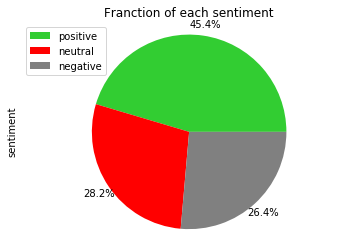

In [7]:
df.sentiment.value_counts().plot(kind="pie",
                               autopct='%1.1f%%',
                               labels=None,
                               pctdistance=1.12,
                               colors=["limegreen", "red", "gray"])
plt.axis('equal')
plt.title("Franction of each sentiment")
plt.legend(labels=df.sentiment.value_counts().index, loc="upper left")
plt.show()

In [8]:
stop_words = set(STOPWORDS)
stop_words.add("xa0")
stop_words.add("https")
stop_words.add("twitter")
stop_words.add("tweet")
stop_words.add("pic")
stop_words.add("i")
stop_words.add("com")

def create_wordcloud(tweets, bg_color):
    wordcloud = WordCloud(
        background_color=bg_color,
        width=1000,
        height=500,
        contour_color='steelblue',
        stopwords=stop_words).generate(str(tweets))
    return wordcloud

(-0.5, 999.5, 499.5, -0.5)

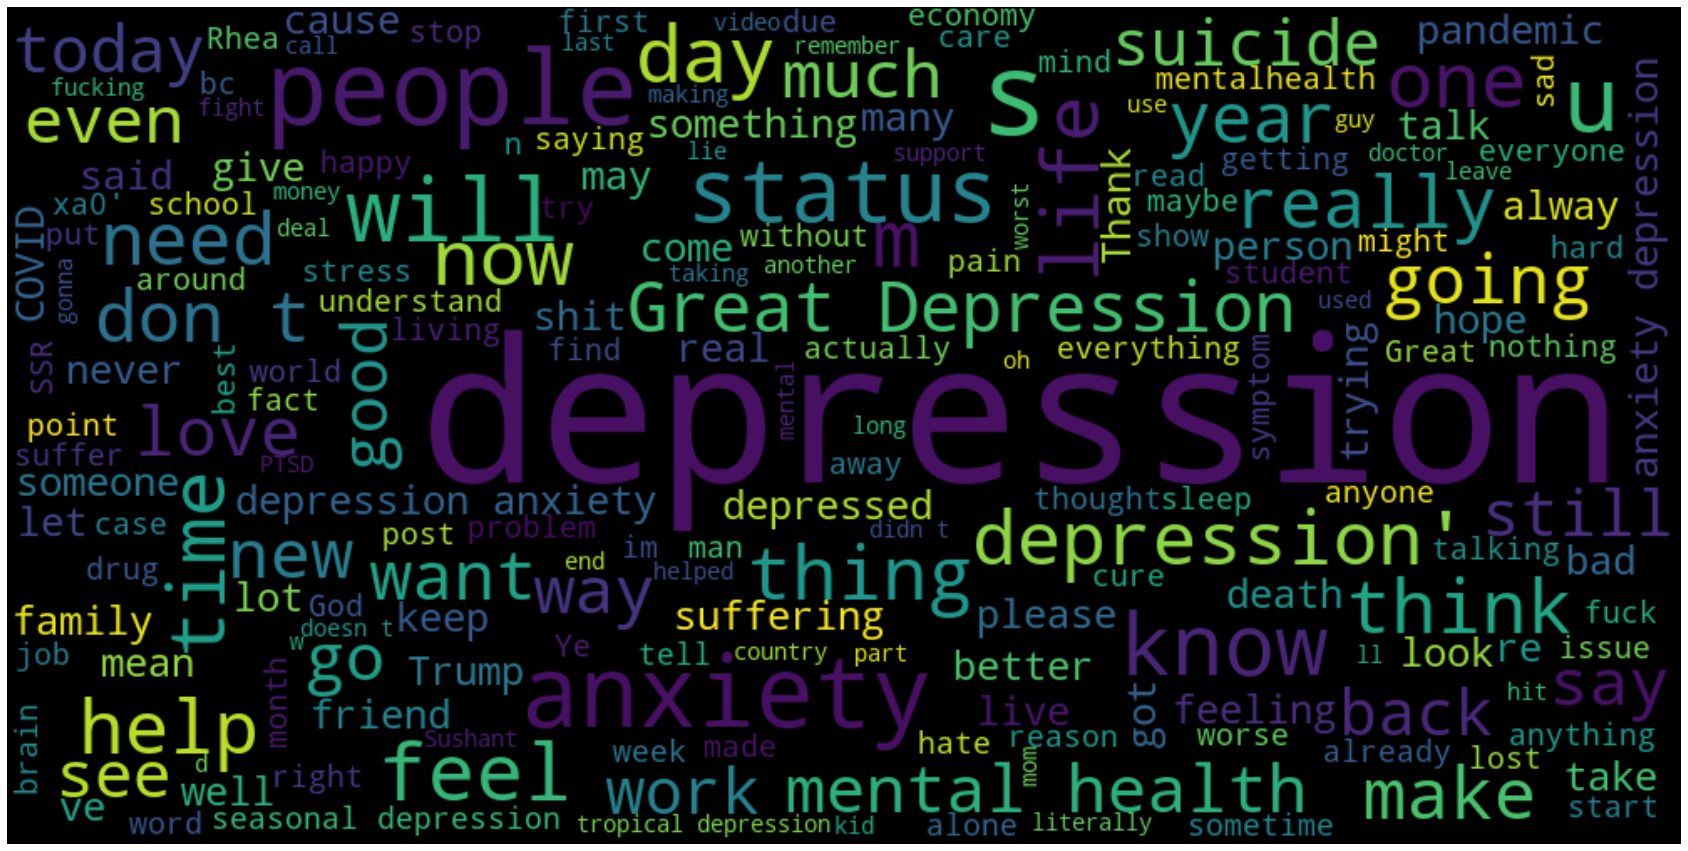

In [9]:
plt.rcParams["figure.figsize"] = 30, 30
wordcloud = create_wordcloud(set(df.tweet), "black")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

In [10]:
df_random = pd.read_csv("tweets_random.csv")
df_random.head()

,date,username,tweet,hashtags,nlikes
0,2020-08-31 21:39:04,RobertPRowley2,I'd be swinging from the ceiling light. https...,[],0
1,2020-08-30 23:57:17,Wprostbiznes,W. ➡️ https://premium.wprost.pl/10357487/armag...,[],37
2,2020-08-31 21:39:04,lucisbeer,ok but would anyone wanna join and be fcking A...,[],0
3,2020-08-31 21:39:04,DanDaggerDick,Omg hi may i dm you?,[],0
4,2020-08-31 21:39:04,realMarkMoney,"I love your work, but you’re just wrong on thi...",[],0


(-0.5, 999.5, 499.5, -0.5)

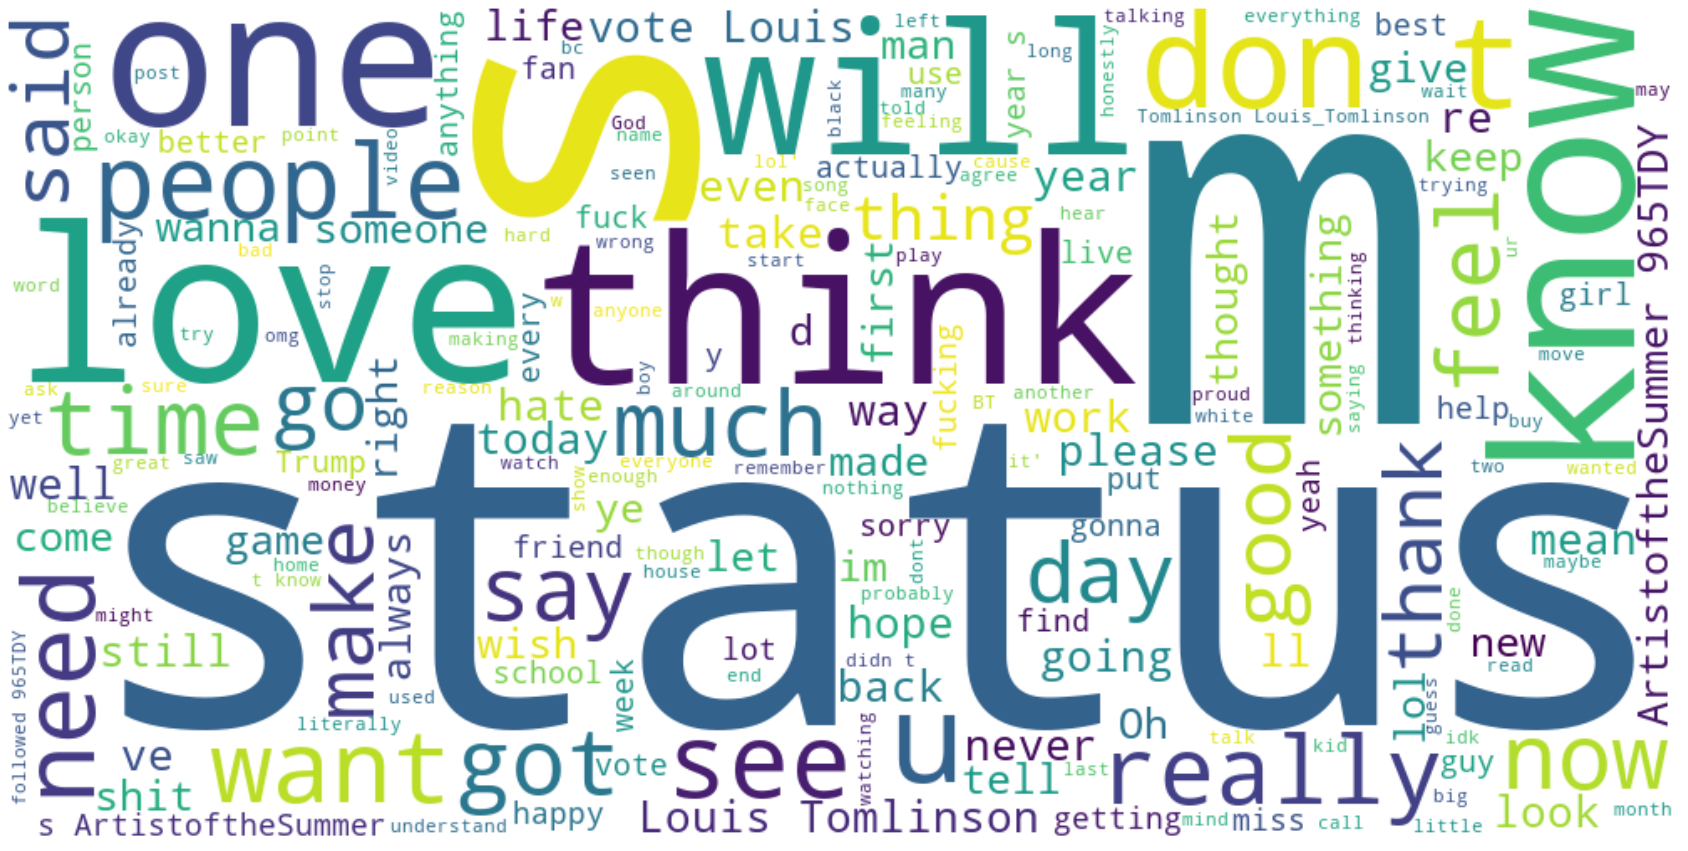

In [12]:
wordcloud = create_wordcloud(set(df_random.tweet), "white")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

In [13]:
sentiments = []

for tweet in list(df_random.tweet):
    analysis = TextBlob(tweet)
    sent = analysis.sentiment
    
    if sent[0] > 0:
        category = "positive"
    elif sent[0] < 0:
        category = "negative"
    else:
        category = "neutral"
    sentiments.append(category)
df_random["sentiment"] = sentiments
df_random.head()

,date,username,tweet,hashtags,nlikes,sentiment
0,2020-08-31 21:39:04,RobertPRowley2,I'd be swinging from the ceiling light. https...,[],0,positive
1,2020-08-30 23:57:17,Wprostbiznes,W. ➡️ https://premium.wprost.pl/10357487/armag...,[],37,neutral
2,2020-08-31 21:39:04,lucisbeer,ok but would anyone wanna join and be fcking A...,[],0,positive
3,2020-08-31 21:39:04,DanDaggerDick,Omg hi may i dm you?,[],0,neutral
4,2020-08-31 21:39:04,realMarkMoney,"I love your work, but you’re just wrong on thi...",[],0,positive


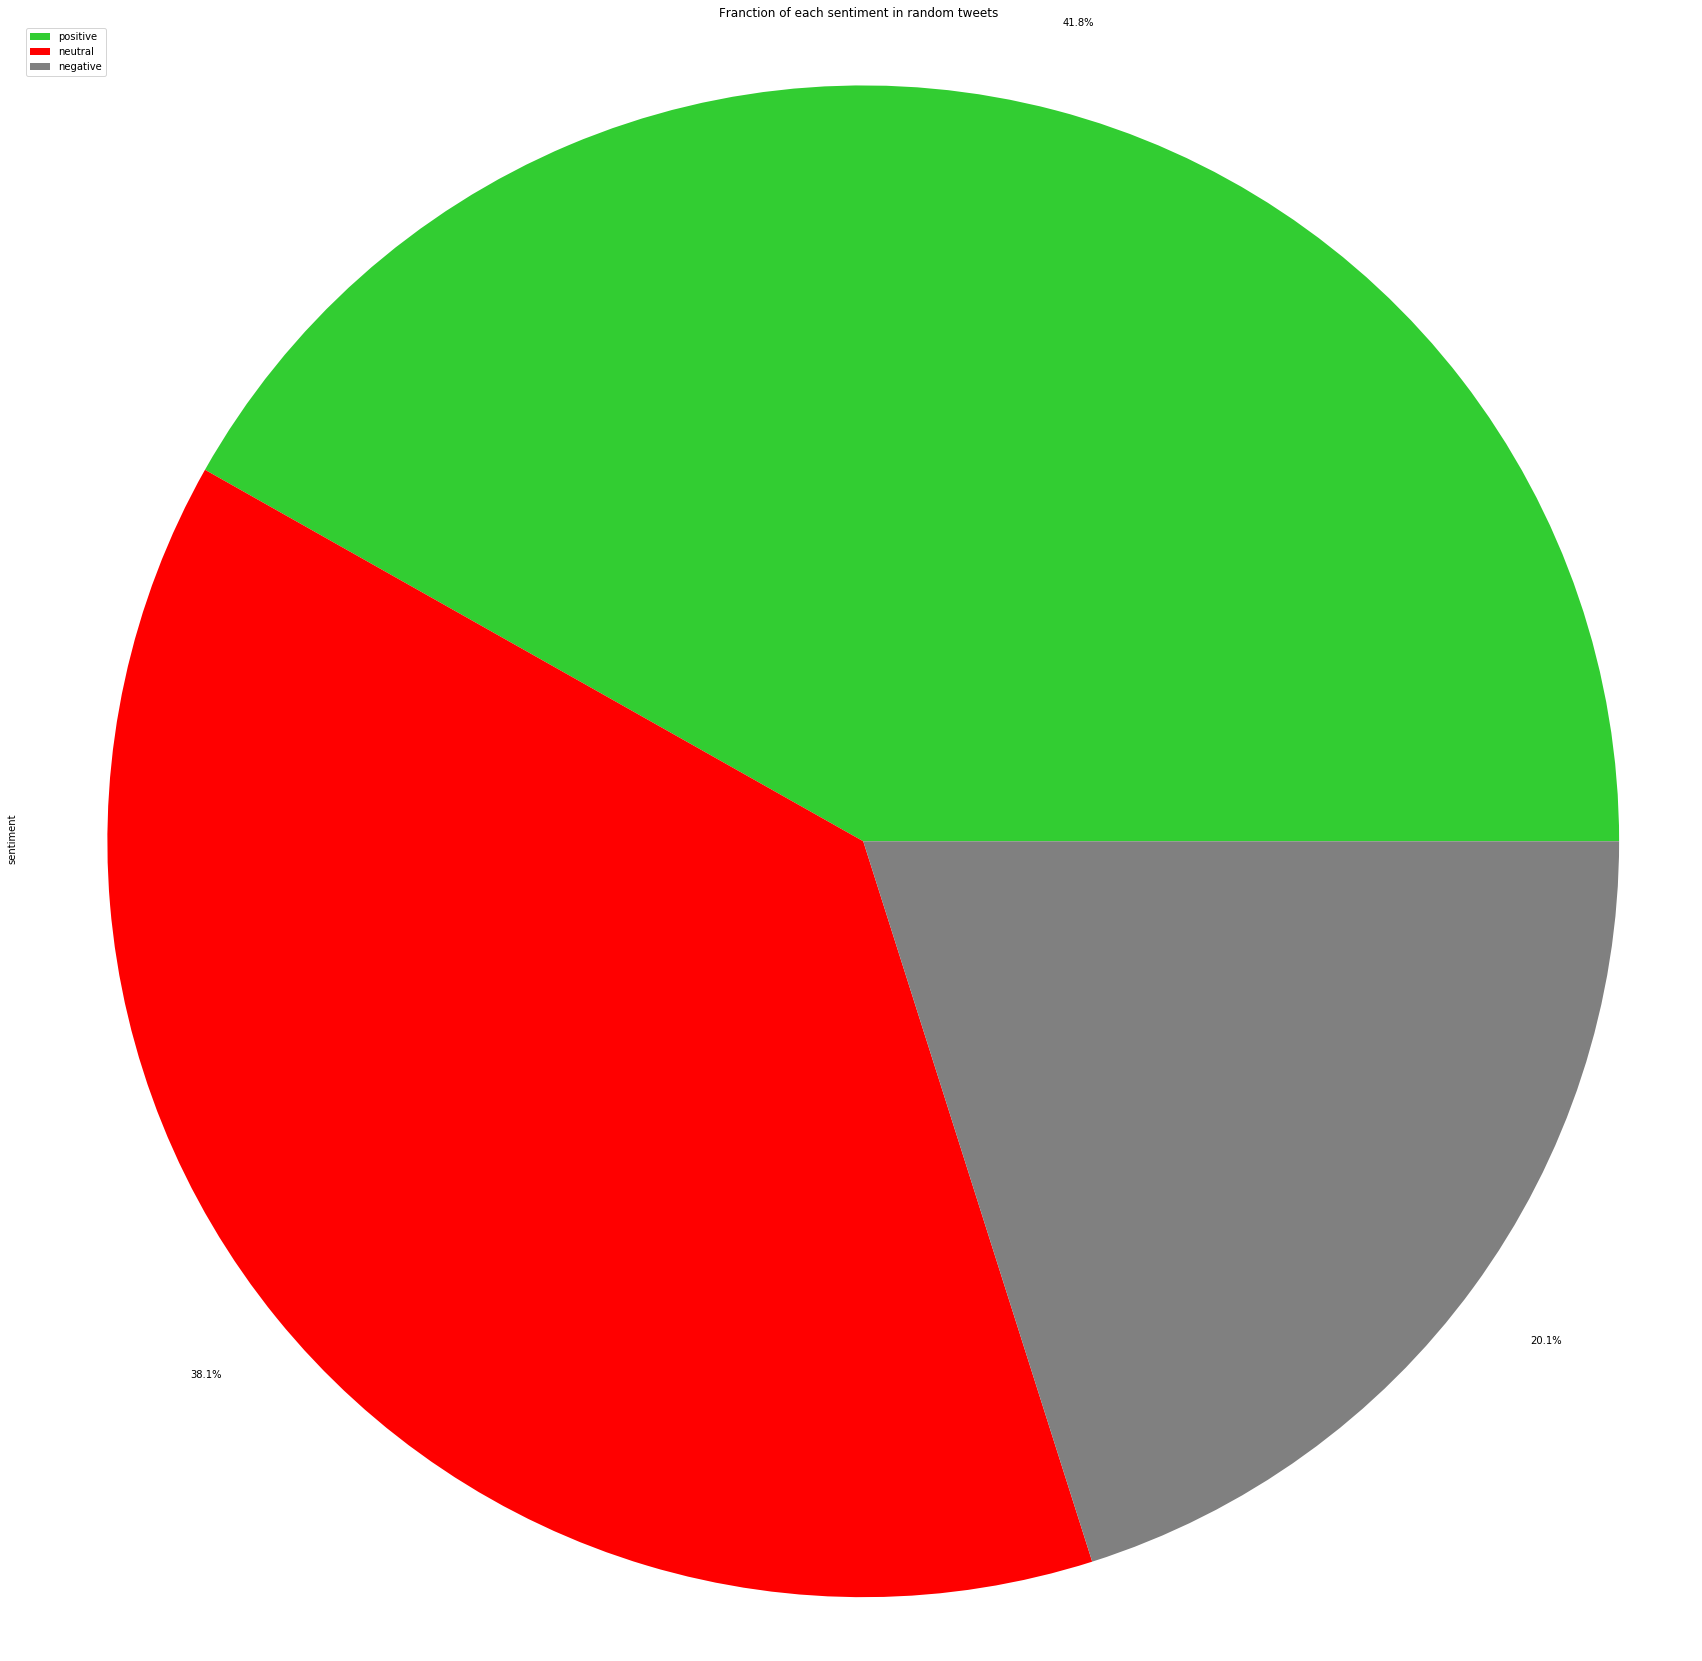

In [14]:
df_random.sentiment.value_counts().plot(kind="pie",
                               autopct='%1.1f%%',
                               labels=None,
                               pctdistance=1.12,
                               colors=["limegreen", "red", "gray"])
plt.axis('equal')
plt.title("Franction of each sentiment in random tweets")
plt.legend(labels=df.sentiment.value_counts().index, loc="upper left")
plt.show()

In [15]:
df.username.value_counts().to_frame()

,username
nad1il,29
canisgallicus,28
gallery_of_doug,22
champashis,20
gagareasons,19
...,...
pratikdeb11,1
callmerosey1,1
NtombiCrystal,1
isooner,1


In [16]:
df["day"] = df.date.str[:-9]
df["hour"] = df.date.str[-8:]
df.head()

,date,username,tweet,hashtags,nlikes,sentiment,day,hour
0,2020-08-31 21:48:38,ajk_,Hangover depression is a thing and it is well ...,[],0,neutral,2020-08-31,21:48:38
1,2020-08-31 21:48:37,Macroprupolicy,Faltering fiscal policy raises the odds of a d...,[],0,neutral,2020-08-31,21:48:37
2,2020-08-31 21:48:34,bolio_93,"In my headcannon he divorsed, and after a coup...",[],0,positive,2020-08-31,21:48:34
4,2020-08-31 21:48:32,Zinotox,September 27th - you mean the day I fly back t...,[],0,positive,2020-08-31,21:48:32
5,2020-08-31 21:48:32,livingbeige,she said he went camping to “heal”.... okay wh...,[],0,positive,2020-08-31,21:48:32


In [17]:
df_frequency = df.hour.str[:2].value_counts().to_frame().reset_index()
df_frequency.columns = ["hour", "count"]
df_frequency.hour = df_frequency.hour.astype(int)
df_frequency = df_frequency.sort_values(by="hour").reset_index()[["hour", "count"]]
df_frequency

,hour,count
0,13,295
1,14,977
2,15,1087
3,16,1186
4,17,1258
5,18,1353
6,19,1367
7,20,1383
8,21,1085


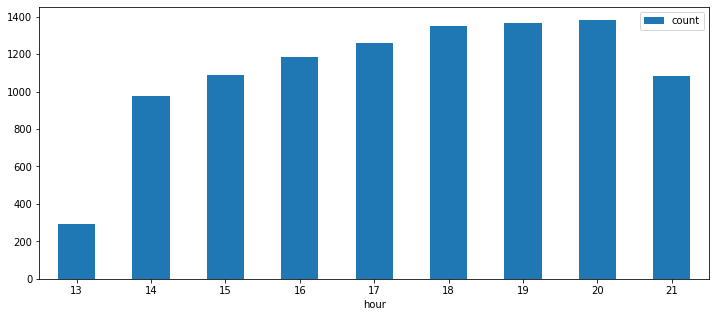

In [18]:
df_frequency.plot(kind="bar", x="hour", y="count", figsize=(12, 5), rot=0)

In [19]:
df.tweet = df.tweet.str.lower()
df = df.dropna(axis=0)
# df = df.drop([2110, 7763, 995])
df = df[~df.tweet.str.contains("great depression")]
df = df[~df.tweet.str.contains("economic depression")]
df_popular = df.sort_values(by="nlikes", ascending=False).head(10)
df_popular
for i, row in df_popular.iterrows():
    print(row["tweet"], "\n")

remember when jungkook said that when you are drowning in frustration and depression, he will throw this tube so that you could escape safely. he truly has the biggest heart :(  #jungkookday #stillwithjungkook pic.twitter.com/wsvubanold 

our emotions are valid pero wag din tayo mag self diagnose. hindi porket nalungkot tayo once eh may “depression” na kagad. depression is a medical condition and it is diagnosed by professionals only. luhbyu ❤️ 

"happy first day of school"  the million kids and teenagers who suffer from anxiety, depression, bullying and stress because of school:  pic.twitter.com/sefkhwbks6 

biden: "president obama and i stopped a depression in 2009. we took a bad economy that was falling and turned it around. trump took a good economy and drove it back into the ditch."  pic.twitter.com/myydghgx0l 

do you guys pronounce it "league of legends" or "the cause of my depression" 

this is fucking insane. meanwhile, trump said that if he loses, the us will face the worst d

In [20]:
import tensorflow as tf
from tensorflow.keras import layers as ly
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer

In [21]:
df1 = df[["tweet"]]
df1["class"] = 1
df2 = df_random[["tweet"]]
df2 = df2[~df2.tweet.str.contains("depression")]
df2 = df2[~df2.tweet.str.contains("Depression")]
df2["class"] = 0
df_whole = pd.concat([df1, df2]).reset_index()[["tweet", "class"]]
df_whole

C:\Users\91984\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tweet,class
0,hangover depression is a thing and it is well ...,1
1,faltering fiscal policy raises the odds of a d...,1
2,"in my headcannon he divorsed, and after a coup...",1
3,september 27th - you mean the day i fly back t...,1
4,she said he went camping to “heal”.... okay wh...,1
...,...,...
19256,I can sense the strength in this man!👍,0
19257,Aaaaaand now it is being delivered tomorrow. I...,0
19258,I #LoveNote20Camera! If you love to snap the #...,0
19259,"♡also, if you want map sprites made for an exi...",0


In [22]:
df_whole = df_whole.sample(frac=1).reset_index()[["tweet", "class"]]
df_whole

,tweet,class
0,guess my anxiety and depression is back so yay...,1
1,yes that’d be a great topic i’ve also noticed ...,1
2,he said that and i was immediately ready for g...,0
3,"I understand how you feel . Please,be strong ❤️💡",0
4,"Why did I agree to fucking take this class, it...",0
...,...,...
19256,depression is bad when you’re no longer horny,1
19257,@DYStateofMind I will be discussing the future...,0
19258,I'm intrigued on that 12k per 9 innings rate t...,0
19259,and 1 year ago today after dealing with a very...,1


In [23]:
df_whole.to_csv("shuffled_data.csv", index=False)

In [ ]:
import twint
import nest_asyncio
import pandas as pd
nest_asyncio.apply()

In [ ]:
c = twint.Config()
c.Search = "depression"
c.Format = "Username: {username} |  Tweet: {tweet}"
c.Limit = 10
c.Lang = 'en'
c.Pandas = True
c.Hide_output = True

twint.run.Search(c)

In [ ]:
df = twint.output.panda.Tweets_df[["date", "username", "tweet", "hashtags", "nlikes"]]
df